# ML三十天比赛学习
## 第一次打卡内容
### 包导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 数据读取

In [2]:
## 1）载入数据集与测试集
Train_data = pd.read_csv('used_car_train_20200313.csv',sep=' ')
Test_data = pd.read_csv('used_car_testB_20200421.csv',sep=' ')

print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


In [3]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


## 第二次打卡
### 使用Pandas对比赛数据集进行分析
#### 分析每个字段的取值、范围（unique）和类型（dtypes）

In [4]:
## 训练集与测试集的取值
print(Train_data.value_counts)
print(Test_data.value_counts)

<bound method DataFrame.value_counts of         SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0            0     736  20040402   30.0      6       1.0       0.0      0.0   
1            1    2262  20030301   40.0      1       2.0       0.0      0.0   
2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
3            3   71865  19960908  109.0     10       0.0       0.0      1.0   
4            4  111080  20120103  110.0      5       1.0       0.0      0.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
149995  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
149996  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
149997  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
149998  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
149999  149999  177672  19990204   19.0     28       6.0       0.0      1.0   

        pow

In [5]:
## 训练集与测试集的范围
# 训练集
for i in Train_data.columns:
    print(i)
    print((Train_data[i].min(), Train_data[i].max()))

SaleID
(0, 149999)
name
(0, 196812)
regDate
(19910001, 20151212)
model
(0.0, 247.0)
brand
(0, 39)
bodyType
(0.0, 7.0)
fuelType
(0.0, 6.0)
gearbox
(0.0, 1.0)
power
(0, 19312)
kilometer
(0.5, 15.0)
notRepairedDamage
('-', '1.0')
regionCode
(0, 8120)
seller
(0, 1)
offerType
(0, 0)
creatDate
(20150618, 20160407)
price
(11, 99999)
v_0
(30.451976492574097, 52.30417826413088)
v_1
(-4.295588902998176, 7.320308374832438)
v_2
(-4.470671429633041, 19.035496499120867)
v_3
(-7.275036706722688, 9.854701534498924)
v_4
(-4.364565242136745, 6.829351640037848)
v_5
(0.0, 0.2918381130785164)
v_6
(0.0, 0.1514195958971667)
v_7
(0.0, 1.4049363754803494)
v_8
(0.0, 0.1607909853425437)
v_9
(0.0, 0.2227874876178012)
v_10
(-9.16819241041124, 12.357010623760557)
v_11
(-5.558206704301587, 18.81904246676505)
v_12
(-9.639552113720727, 13.84779152435834)
v_13
(-4.153898795903344, 11.147668612774805)
v_14
(-6.5465559654597785, 8.658417876941384)


In [6]:
# 测试集
for i in Test_data.columns:
    print(i)
    print((Train_data[i].min(), Train_data[i].max()))

SaleID
(0, 149999)
name
(0, 196812)
regDate
(19910001, 20151212)
model
(0.0, 247.0)
brand
(0, 39)
bodyType
(0.0, 7.0)
fuelType
(0.0, 6.0)
gearbox
(0.0, 1.0)
power
(0, 19312)
kilometer
(0.5, 15.0)
notRepairedDamage
('-', '1.0')
regionCode
(0, 8120)
seller
(0, 1)
offerType
(0, 0)
creatDate
(20150618, 20160407)
v_0
(30.451976492574097, 52.30417826413088)
v_1
(-4.295588902998176, 7.320308374832438)
v_2
(-4.470671429633041, 19.035496499120867)
v_3
(-7.275036706722688, 9.854701534498924)
v_4
(-4.364565242136745, 6.829351640037848)
v_5
(0.0, 0.2918381130785164)
v_6
(0.0, 0.1514195958971667)
v_7
(0.0, 1.4049363754803494)
v_8
(0.0, 0.1607909853425437)
v_9
(0.0, 0.2227874876178012)
v_10
(-9.16819241041124, 12.357010623760557)
v_11
(-5.558206704301587, 18.81904246676505)
v_12
(-9.639552113720727, 13.84779152435834)
v_13
(-4.153898795903344, 11.147668612774805)
v_14
(-6.5465559654597785, 8.658417876941384)


In [7]:
## 类型
print(Train_data.info())
print(Test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

#### 结合比赛页面中具体字段的含义，对字段的取值分布进行分析

In [8]:
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


### 分析相关性

In [9]:
price_numeric = Train_data
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price         1.000000
v_12          0.692823
v_8           0.685798
v_0           0.628397
regDate       0.611959
gearbox       0.329075
bodyType      0.241303
power         0.219834
fuelType      0.200536
v_5           0.164317
model         0.136983
v_2           0.085322
v_6           0.068970
v_1           0.060914
v_14          0.035911
regionCode    0.014036
creatDate     0.002955
name          0.002030
SaleID       -0.001043
seller       -0.002004
v_13         -0.013993
brand        -0.043799
v_7          -0.053024
v_4          -0.147085
v_9          -0.206205
v_10         -0.246175
v_11         -0.275320
kilometer    -0.440519
v_3          -0.730946
offerType          NaN
Name: price, dtype: float64 



In [10]:
correlation_in_order = correlation['price'].sort_values(ascending = False)
correlation_top_3 = correlation_in_order[0:4]
print(correlation_top_3,'/n')

price    1.000000
v_12     0.692823
v_8      0.685798
v_0      0.628397
Name: price, dtype: float64 /n


In [21]:
?correlation_top_3

<AxesSubplot:title={'center':'Correlation of Numeric Features with Price'}>

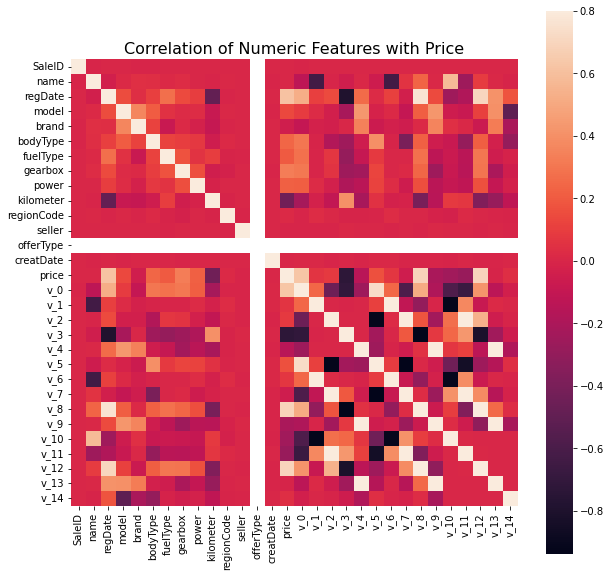

In [30]:
## 绘制热力图
import seaborn as sns
f , ax = plt.subplots(figsize = (10, 10))

plt.title('Correlation of Numeric Features with Price',y=1,size=16)

sns.heatmap(correlation ,square = True,  vmax=0.8)

## 使用 log 对标签字段进行转换

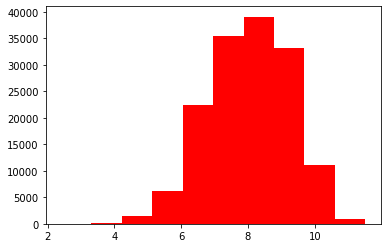

In [31]:
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()